In [10]:
# data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pickle files
import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#cali functions
import sys
sys.path.append('../utils')
import functions_cali_homes_model as cf


plt.style.use('dark_background')


load the data, add a region feature

In [11]:
#load the data
df=pd.read_csv('sklearn_cali_housing.csv')
#retrieve the region data from the .pkl file
with open("../utils/Cali_Housing_LatMinLatMax_LongMinLongMax_key.pkl", "rb") as f:
    region_data = pickle.load(f)
# add a region feature
df['Region']=df.apply(lambda row: cf.get_region(row['Latitude'],row['Longitude'],region_data),axis=1)
#selelct features and check for nan or 0s
df=df[['Target','Region','MedInc','AveRooms']]
df=df.loc[(df!=0).all(axis=1)]

# Simple, one feature, linear regression using the 'Region' feature derived for latitudes and longitudes

As demonstrated in the accompanying Cali_Housing.ipynb file, the following coefficients were derived after log transformation across all columns

In [12]:
coefficients1={'Region': 0.9925411085931134, 'intercept': -0.015509072764321674}

In [13]:
#predict the target and use np.exp() to reverse the log transformation
df1=df.copy()
df1[['Region']]=df1[['Region']]
df1['predicted_target']=df1.apply(lambda row: row['Region']*coefficients1['Region']+coefficients1['intercept'],axis=1)

# r2 score

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(df1['Target'], df1['predicted_target'])
print(r2)

0.8343988779447519


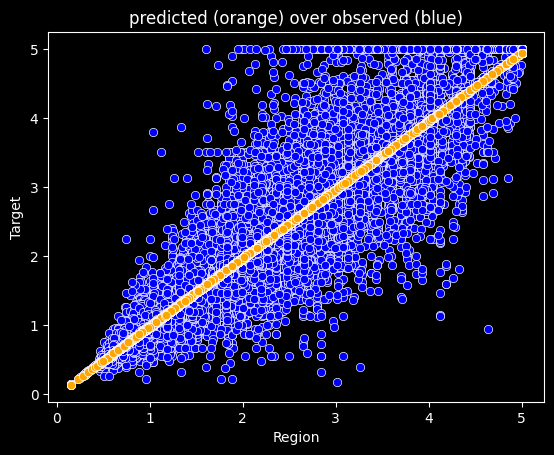

In [15]:

plt.title('predicted (orange) over observed (blue)')

sns.scatterplot(x=df1['Region'],y=df1['Target'],color='blue')
sns.scatterplot(x=df1['Region'],y=df1['predicted_target'],color='orange')
plt.show()